In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use("default")
sns.set(rc={"figure.figsize": (10, 5)})

In [3]:
file_path = "Electric Vehicle Sales by State in India.csv"  
df = pd.read_csv(file_path)

In [4]:
print("Shape of data (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nSample rows:")
display(df.head())

Shape of data (rows, columns): (96845, 8)

Column names: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

Sample rows:


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics of EV_Sales_Quantity:")
print(df['EV_Sales_Quantity'].describe())


Data types:
Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

Missing values per column:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Basic statistics of EV_Sales_Quantity:
count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64


In [6]:
if df['Year'].dtype != 'int64':
    df['Year'] = df['Year'].astype(int)

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df['Year_Month'] = df['Date'].dt.to_period('M').astype(str)

In [9]:
print("\nAfter type conversion:")
print(df.dtypes)


After type conversion:
Year                          int64
Month_Name                   object
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
Year_Month                   object
dtype: object


In [10]:
total_ev_sales = df['EV_Sales_Quantity'].sum()
print(f"\nTotal EV sales in dataset: {total_ev_sales:,.0f}")

sales_by_year = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
print("\nEV Sales by Year:")
print(sales_by_year)

sales_by_state = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index() \
                   .sort_values('EV_Sales_Quantity', ascending=False)

print("\nTop 10 States by Total EV Sales:")
print(sales_by_state.head(10))

sales_by_type = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index() \
                  .sort_values('EV_Sales_Quantity', ascending=False)
print("\nEV Sales by Vehicle_Type:")
print(sales_by_type)

sales_by_category = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index() \
                      .sort_values('EV_Sales_Quantity', ascending=False)
print("\nEV Sales by Vehicle_Category:")
print(sales_by_category)


Total EV sales in dataset: 3,593,811

EV Sales by Year:
    Year  EV_Sales_Quantity
0   2014             2392.0
1   2015             7805.0
2   2016            49855.0
3   2017            87420.0
4   2018           130254.0
5   2019           166819.0
6   2020           124684.0
7   2021           331498.0
8   2022          1024723.0
9   2023          1525179.0
10  2024           143182.0

Top 10 States by Total EV Sales:
            State  EV_Sales_Quantity
31  Uttar Pradesh           732074.0
19    Maharashtra           401535.0
15      Karnataka           315498.0
8           Delhi           268538.0
27      Rajasthan           228573.0
4           Bihar           213465.0
29     Tamil Nadu           206902.0
10        Gujarat           176713.0
3           Assam           151917.0
16         Kerala           133246.0

EV Sales by Vehicle_Type:
          Vehicle_Type  EV_Sales_Quantity
0          2W_Personal          1796340.0
6   3W_Shared_LowSpeed          1408127.0
7          4W

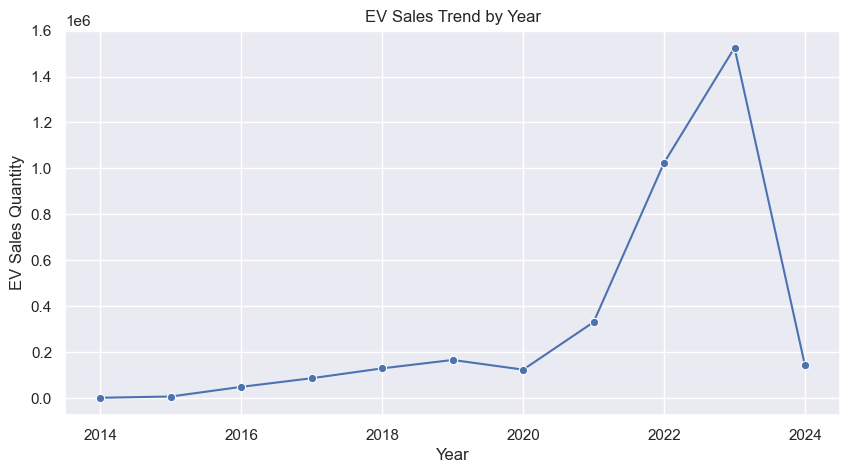

In [11]:
plt.figure()
sns.lineplot(data=sales_by_year, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title("EV Sales Trend by Year")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True)
plt.show()

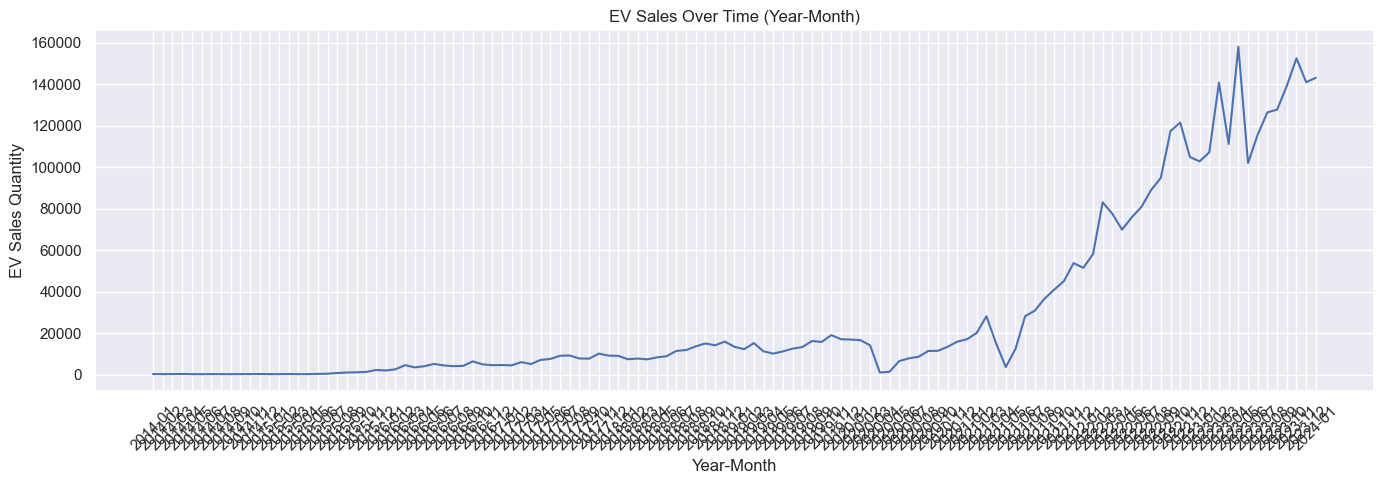

In [17]:
sales_by_year_month = df.groupby('Year_Month')['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=sales_by_year_month, x='Year_Month', y='EV_Sales_Quantity')
plt.title("EV Sales Over Time (Year-Month)")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.grid(True)
plt.show()

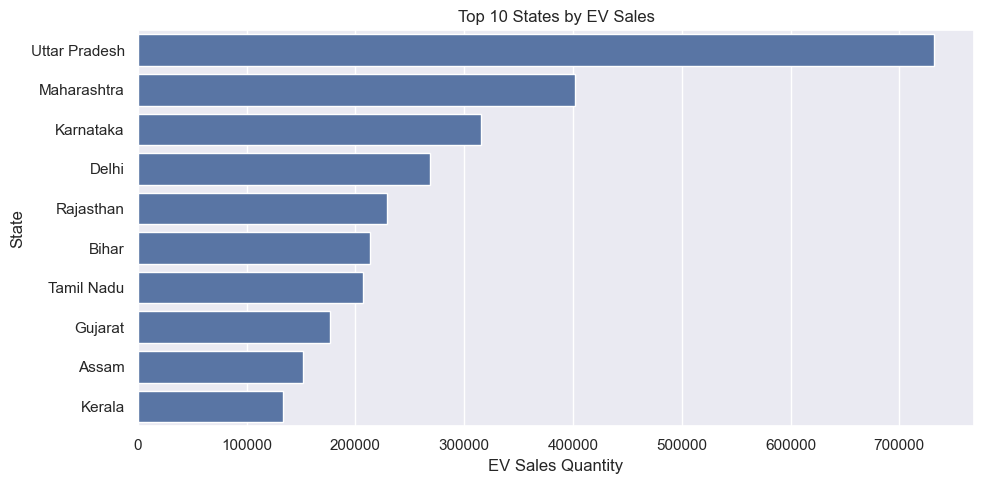

In [18]:
top_states = sales_by_state.head(10)

plt.figure()
sns.barplot(data=top_states, x='EV_Sales_Quantity', y='State')
plt.title("Top 10 States by EV Sales")
plt.xlabel("EV Sales Quantity")
plt.ylabel("State")
plt.tight_layout()
plt.show()

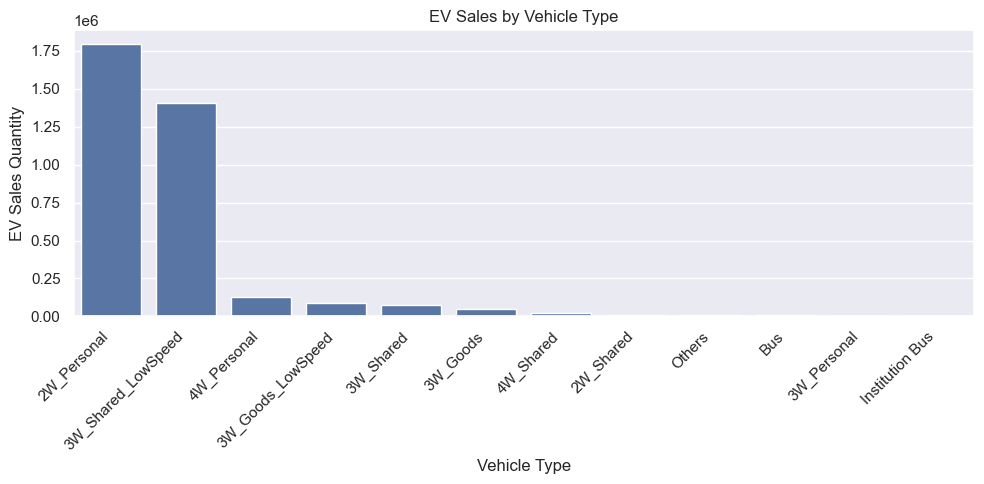

In [19]:
plt.figure()
sns.barplot(data=sales_by_type, x='Vehicle_Type', y='EV_Sales_Quantity')
plt.title("EV Sales by Vehicle Type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Vehicle Type")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()

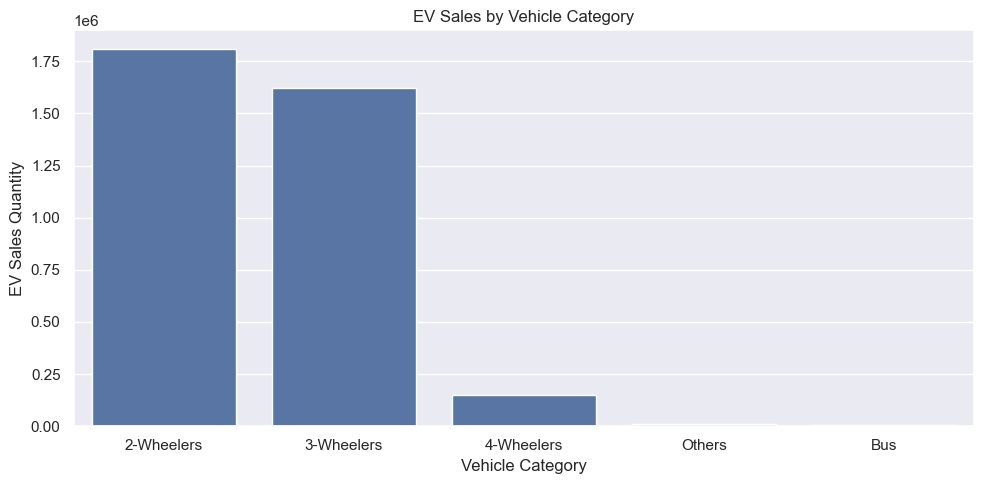

In [20]:
plt.figure()
sns.barplot(data=sales_by_category, x='Vehicle_Category', y='EV_Sales_Quantity')
plt.title("EV Sales by Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()


Year vs Vehicle Category Pivot Table:
Vehicle_Category  2-Wheelers  3-Wheelers  4-Wheelers     Bus  Others
Year                                                                
2014                  1679.0        12.0       498.0     3.0   200.0
2015                  1447.0      5440.0       761.0     4.0   153.0
2016                  1460.0     47352.0       692.0     5.0   346.0
2017                  1528.0     83530.0      1108.0    17.0  1237.0
2018                 17059.0    110451.0      1588.0    49.0  1107.0
2019                 30357.0    134168.0      1666.0   506.0   122.0
2020                 29110.0     91236.0      4201.0    88.0    49.0
2021                156196.0    159909.0     13002.0  1177.0  1214.0
2022                631090.0    352742.0     38170.0  1988.0   733.0
2023                856836.0    582548.0     80121.0  2666.0  3008.0
2024                 81343.0     52922.0      7968.0   506.0   443.0


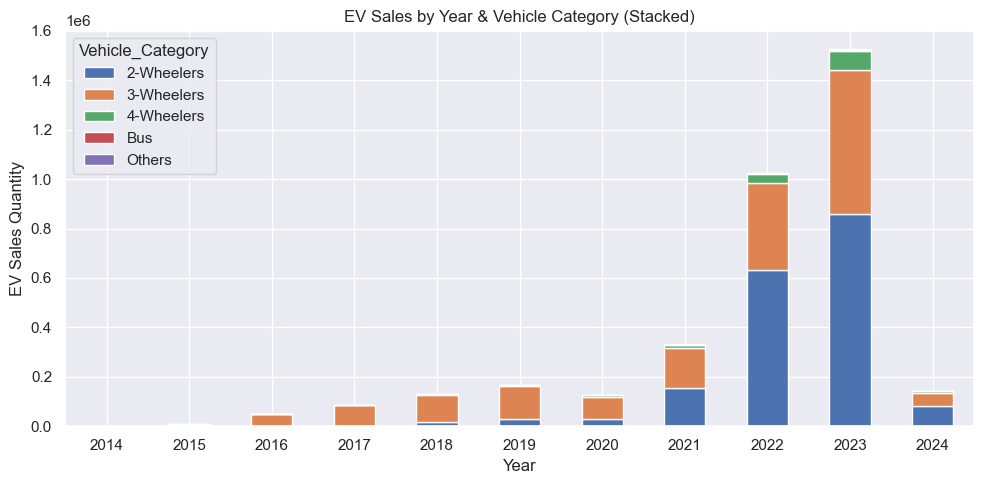

In [21]:
year_category_pivot = df.pivot_table(
    index='Year',
    columns='Vehicle_Category',
    values='EV_Sales_Quantity',
    aggfunc='sum'
).fillna(0)

print("\nYear vs Vehicle Category Pivot Table:")
print(year_category_pivot)

year_category_pivot.plot(kind='bar', stacked=True)
plt.title("EV Sales by Year & Vehicle Category (Stacked)")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
print("\n--- QUICK INSIGHTS (for your report) ---")
print(f"1) Total EVs sold: {total_ev_sales:,.0f}")
print(f"2) Highest sales year: {sales_by_year.loc[sales_by_year['EV_Sales_Quantity'].idxmax(), 'Year']}")
print(f"3) Top state by EV sales: {sales_by_state.iloc[0]['State']}")
print(f"4) Top vehicle category: {sales_by_category.iloc[0]['Vehicle_Category']}")
print(f"5) Top vehicle type: {sales_by_type.iloc[0]['Vehicle_Type']}")


--- QUICK INSIGHTS (for your report) ---
1) Total EVs sold: 3,593,811
2) Highest sales year: 2023
3) Top state by EV sales: Uttar Pradesh
4) Top vehicle category: 2-Wheelers
5) Top vehicle type: 2W_Personal


In [23]:
df.to_csv("Electric Vehicle Sales by State in India.csv", index=False)
print("\n✅ Cleaned file saved as 'Electric Vehicle Sales by State in India.csv'")


✅ Cleaned file saved as 'Electric Vehicle Sales by State in India.csv'
